In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly
import math

### 1. Perform Data Query and Data Inspection
- Load the dataset.
- Display basic information about the dataset (shape, columns, data types).
- Check for missing values and handle them if necessary.
- Display a few rows of the dataset to understand its structure.

In [62]:
curr_dir=os.getcwd()
f_path = os.path.join(curr_dir, "data", "cancer patient data sets.csv")
df=pd.read_csv(f_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [63]:
# Check if there is any duplicate row based on the Patient Id itself
df["Patient Id"].nunique() == len(df)

True

In [64]:

#drop index column as it is useless
df=df.drop("index", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [65]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [66]:
df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [67]:
unique_values_per_column = {}
for column in df.columns:
    unique_values_per_column[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values_per_column.items():
    if column != "Patient Id":
        print(f"Unique values for column '{column}': {values}")

Unique values for column 'Age': [33 17 35 37 46 52 28 44 64 39 34 27 73 36 14 24 53 62 29 65 38 19 42 32
 25 45 26 48 22 18 23 47 61 55 31 49 43 51 54 63]
Unique values for column 'Gender': [1 2]
Unique values for column 'Air Pollution': [2 3 4 7 6 5 1 8]
Unique values for column 'Alcohol use': [4 1 5 7 8 3 6 2]
Unique values for column 'Dust Allergy': [5 6 7 4 2 8 1 3]
Unique values for column 'OccuPational Hazards': [4 3 5 7 2 6 8 1]
Unique values for column 'Genetic Risk': [3 4 5 6 7 2 1]
Unique values for column 'chronic Lung Disease': [2 4 7 6 3 5 1]
Unique values for column 'Balanced Diet': [2 6 7 4 5 3 1]
Unique values for column 'Obesity': [4 2 7 3 5 6 1]
Unique values for column 'Smoking': [3 2 7 8 1 6 5 4]
Unique values for column 'Passive Smoker': [2 4 3 7 6 8 5 1]
Unique values for column 'Chest Pain': [2 4 7 3 6 5 9 8 1]
Unique values for column 'Coughing of Blood': [4 3 8 9 1 5 7 6 2]
Unique values for column 'Fatigue': [3 1 8 4 5 9 2 6]
Unique values for column 'Weight L

In [68]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


### 2. Exploratory Data Analysis
- Check for imbalanced features and classes
- Examine relationship between features (redundancy for highly correlated features)
- Examine relationship between features and label 

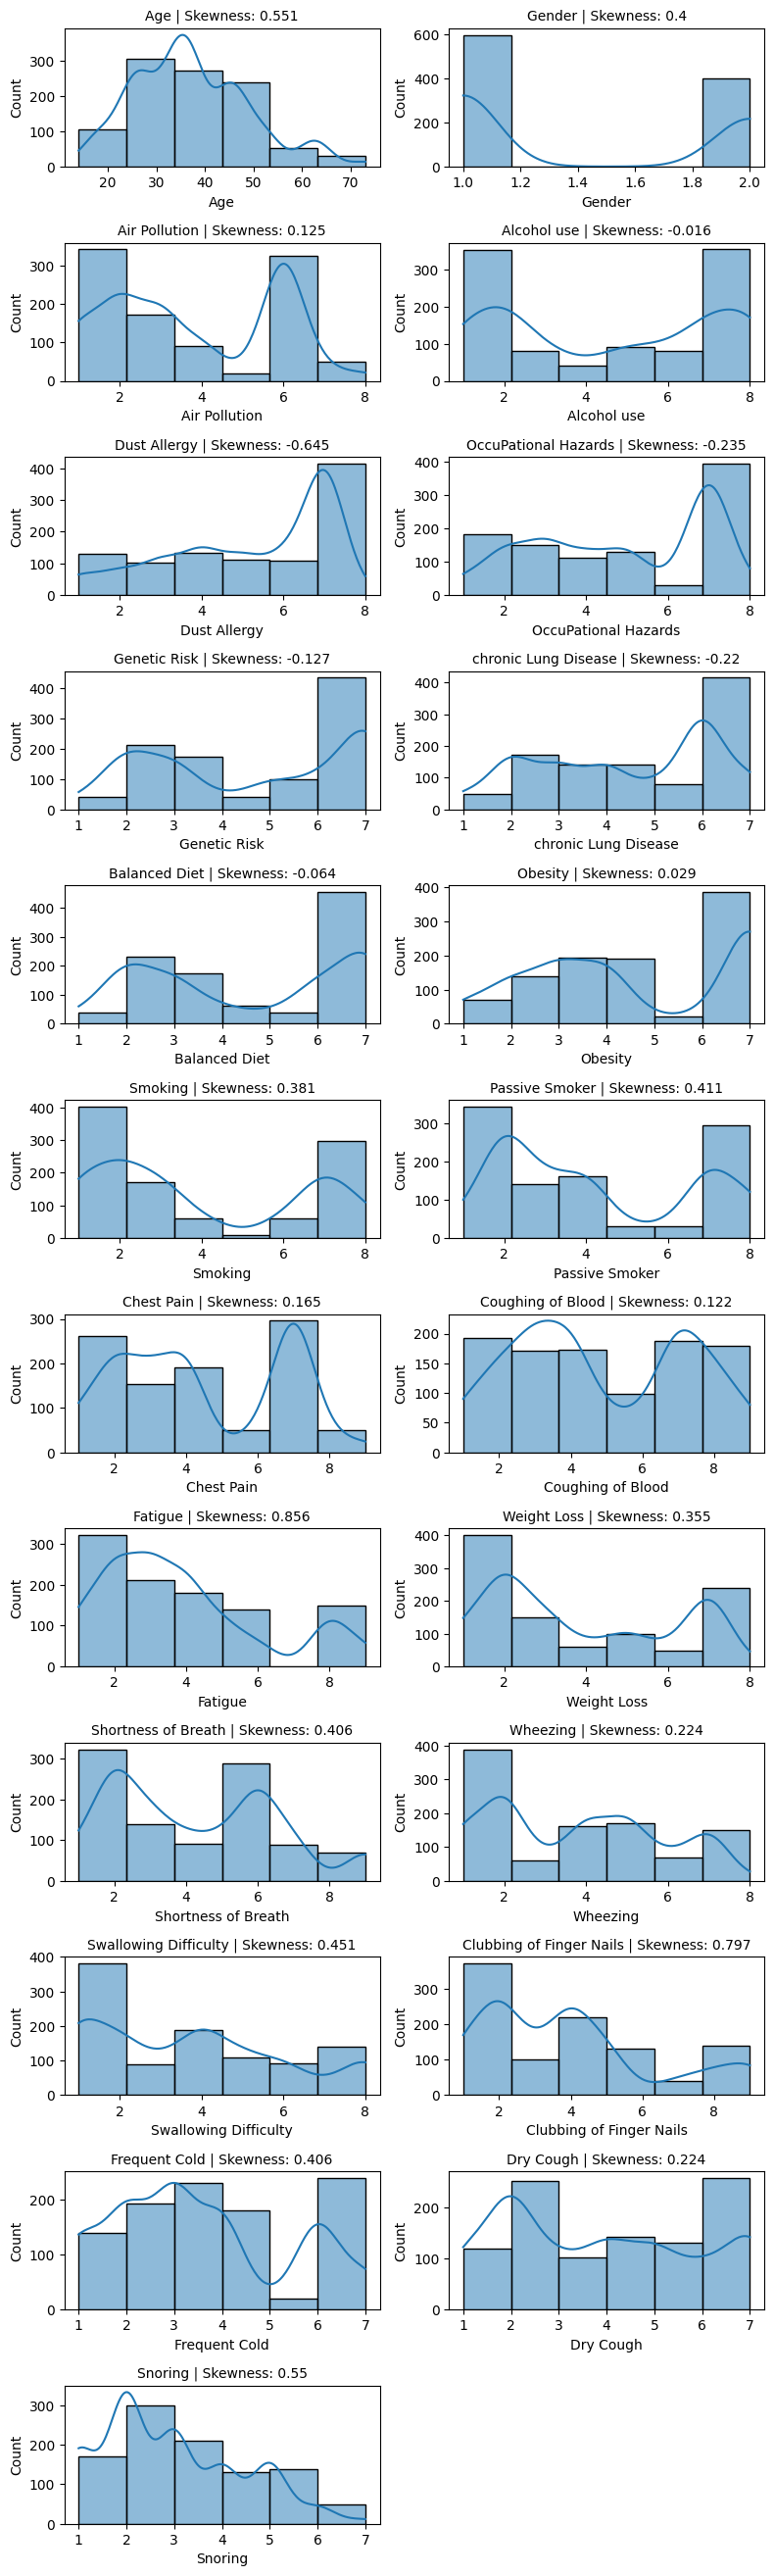

In [69]:
# Remove patient id and label
features = df.drop(["Patient Id","Level"], axis=1)
plt.figure(figsize=(8, 25*2))

# Look at the distribution for each feature and see if there is any feature with abs(skewness)>=1. If so, have to do some sort of transformation such as log transformation 
for index, feature in enumerate(features, 1):
    plt.subplot(23, 2, index)
    sns.histplot(df[feature], kde=True,bins=6)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 3)}",fontsize=10)
 
plt.tight_layout()
plt.show()

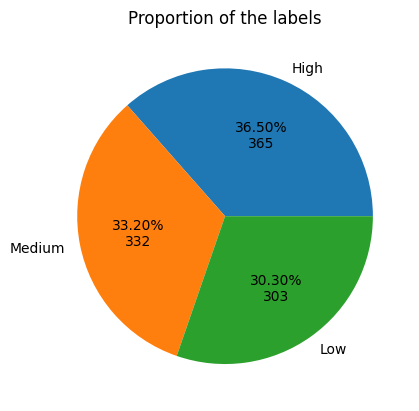

In [70]:
# Check for class balance
# plt.pie(df.level.value_counts(),
#     labels=mapping.keys(),
#     colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
#     autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df.level.value_counts() /100)),
#     explode=tuple(0.01 for i in range(3)),
#     textprops={'fontsize': 20}
# )
plt.figure() 
Level_lst=df['Level'].value_counts()
labels = Level_lst.index.tolist()
counts = Level_lst.values.tolist()
plt.pie(counts, labels=labels, autopct=lambda x: '{:.2f}%\n{:,.0f}'.format(x, x * sum(Level_lst /100)))
plt.title(f'Proportion of the labels')
plt.show()

<Axes: >

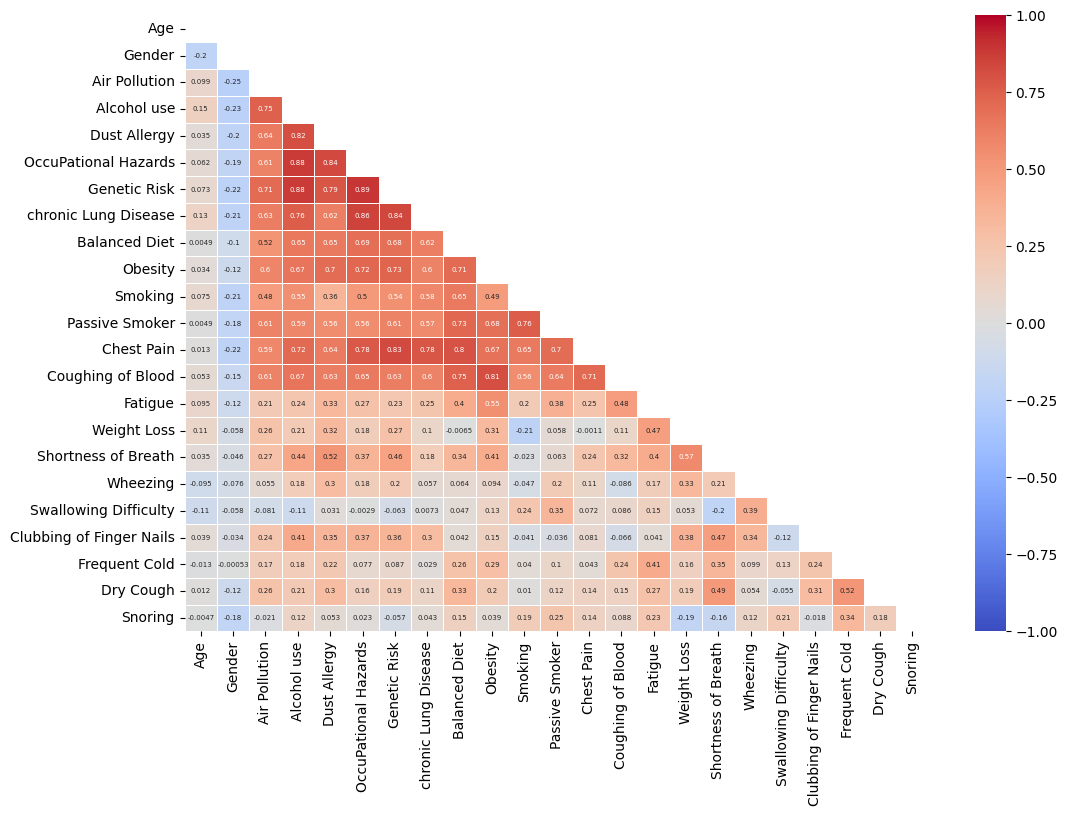

In [71]:
plt.figure(figsize=(12, 8)) 
cmap=sns.color_palette("coolwarm", as_cmap=True)
mask = np.triu(np.ones_like(features.corr()))
sns.heatmap(features.corr(),vmin=-1, vmax=1,annot=True,cmap=cmap,mask=mask, linewidths=0.5, annot_kws={"size": 5})

In [72]:
cor_val = features.corr().unstack()
cor_val = cor_val.sort_values(ascending=False)
cor_val = cor_val[(abs(cor_val) != 1) & (abs(cor_val) > 0.7)]  # Filter for correlation values greater than 0.7
unique_pairs = {}
for pair in cor_val.index:
    if (pair[1], pair[0]) not in unique_pairs:
        unique_pairs[(pair[0], pair[1])] = cor_val[pair]
data = {'Pair': list(unique_pairs.keys()), 'Value': list(unique_pairs.values())}
df_unique_pairs = pd.DataFrame(data)
df_unique_pairs

,Pair,Value
0,"(Genetic Risk, OccuPational Hazards)",0.893049
1,"(OccuPational Hazards, Alcohol use)",0.878786
2,"(Alcohol use, Genetic Risk)",0.877210
3,"(chronic Lung Disease, OccuPational Hazards)",0.858284
4,"(chronic Lung Disease, Genetic Risk)",0.836231
5,"(Dust Allergy, OccuPational Hazards)",0.835860
6,"(Chest Pain, Genetic Risk)",0.831751
7,"(Alcohol use, Dust Allergy)",0.818644
8,"(Coughing of Blood, Obesity)",0.814805
9,"(Balanced Diet, Chest Pain)",0.798207


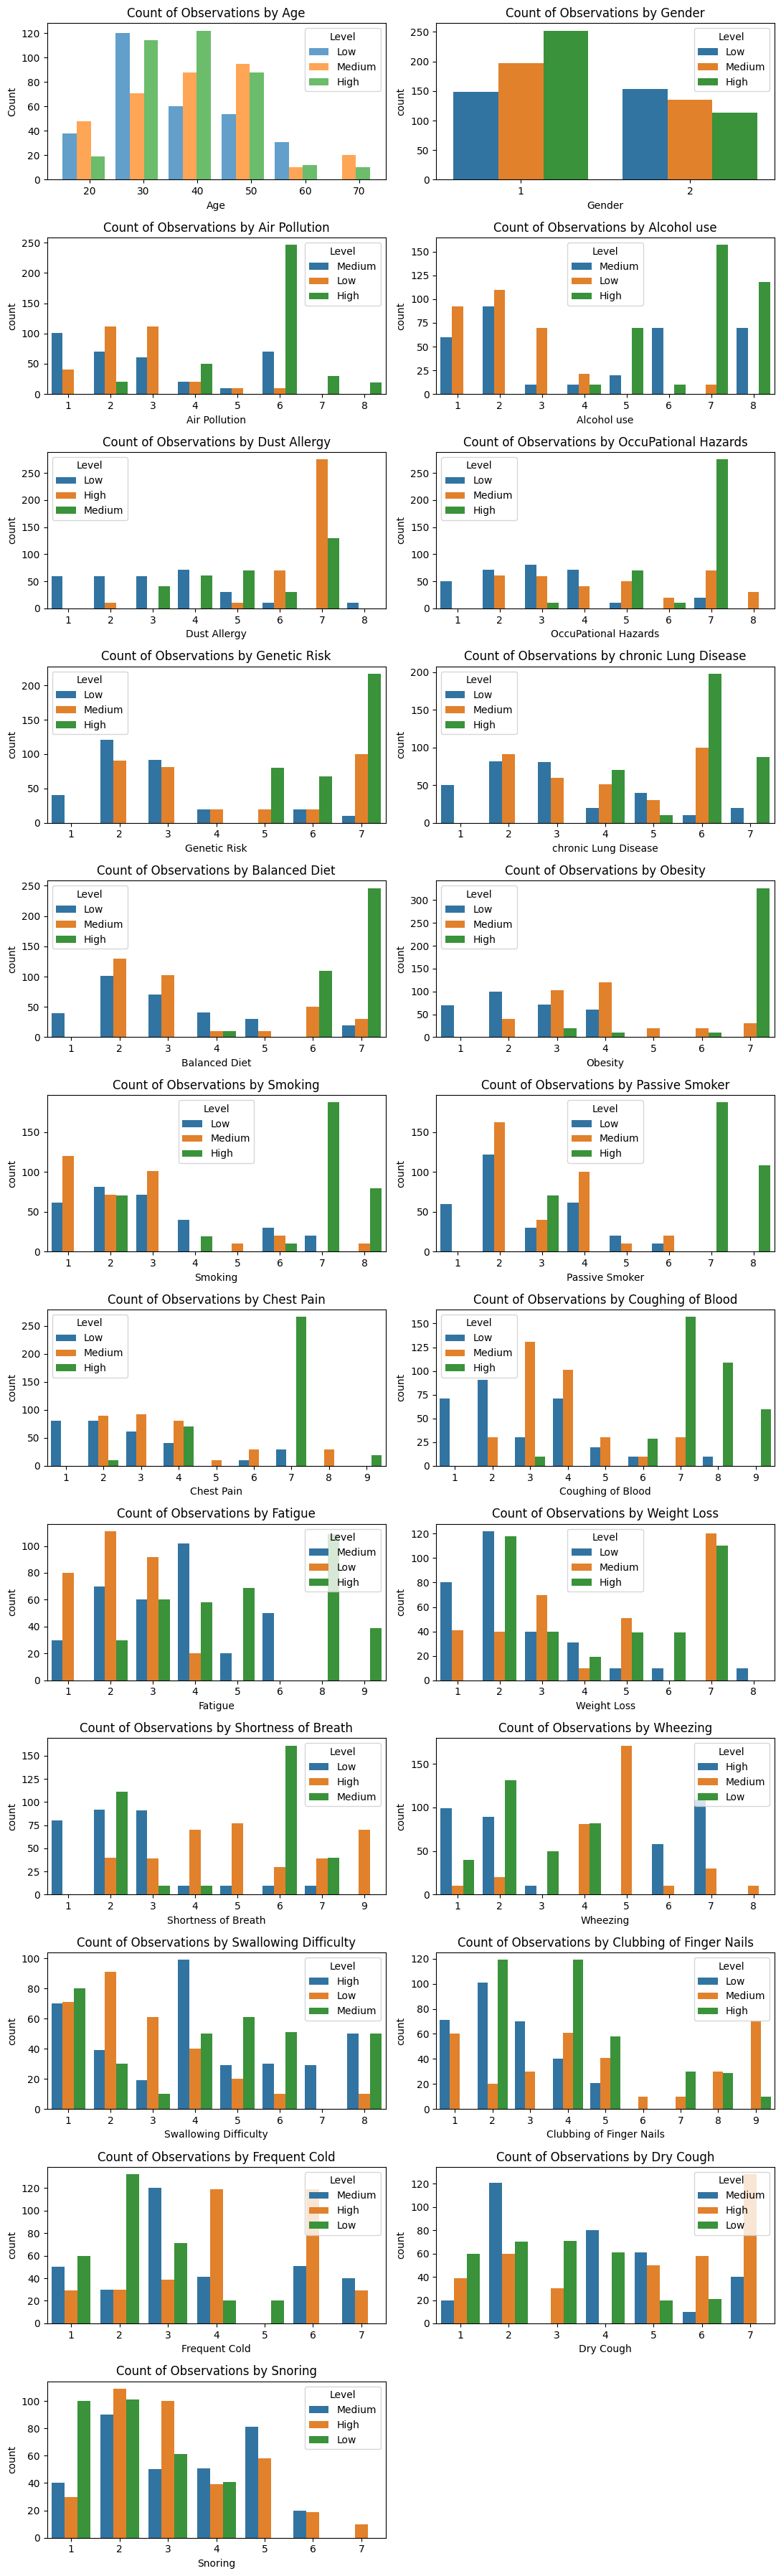

In [73]:

#Plotting cat plot
features_lst=features.columns


# Calculate the number of rows needed based on the number of features
num_features = len(features_lst)
num_rows = math.ceil(num_features / 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(11, 3*num_rows))
axes = axes.flatten()

# Plot each feature
for index, feature in enumerate(features_lst):
    if feature != "Age":
        sns.countplot(x=feature, hue="Level", data=df, dodge=True, linewidth=1, ax=axes[index])
        axes[index].set_title(f"Count of Observations by {feature}")
    else:
        sns.histplot(x=feature, hue="Level", data=df, alpha=0.7, bins=6, multiple="dodge", shrink=.8,linewidth=0, ax=axes[index])
        axes[index].set_title(f"Count of Observations by {feature}")

for j in range(index+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: xlabel='features', ylabel='value'>

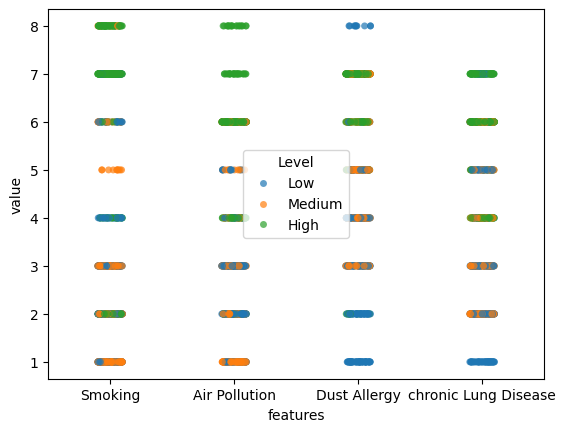

In [74]:
## To be removed later
data_to_plot = pd.melt(df[['Smoking', 'Air Pollution', 'Dust Allergy',  'chronic Lung Disease', 'Level']],
id_vars= 'Level',
var_name= 'features',
value_name= 'value')
sns.stripplot(data=data_to_plot, x='features', y='value', hue= 'Level', alpha=0.7)

### Feature selection
- method 1: scikit-learn select_best_k features
- method 2: PCA 
- method 3: L1 regularisation

#### Method 1

In [75]:
from sklearn.model_selection import train_test_split
X=features
y=df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.preprocessing import MinMaxScaler
X_train_1 , X_test_1, y_train_1, y_test_1=X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
scaler=MinMaxScaler()
scaled_X_train_1= scaler.fit_transform(X_train_1)



Features sorted by variance (lowest to highest):
['Age', 'Snoring', 'Fatigue', 'Dust Allergy', 'Shortness of Breath', 'Chest Pain', 'Air Pollution', 'Wheezing', 'Clubbing of Finger Nails', 'OccuPational Hazards', 'Coughing of Blood', 'Frequent Cold', 'chronic Lung Disease', 'Weight Loss', 'Swallowing Difficulty', 'Passive Smoker', 'Dry Cough', 'Obesity', 'Genetic Risk', 'Balanced Diet', 'Smoking', 'Alcohol use', 'Gender']


<Figure size 1500x600 with 0 Axes>

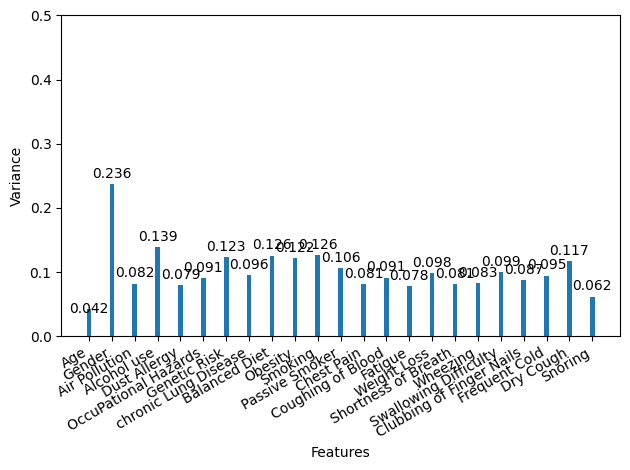

In [77]:
plt.figure(figsize=(15, 6))
fig, ax = plt. subplots()
x = X.columns
y = scaled_X_train_1.var(axis=0)
ax.bar(x, y, width=0.2)
ax. set_xlabel('Features')
ax. set_ylabel('Variance')
ax.set_ylim(0, 0.5)

# for index, value in enumerate(y):
#     plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha= 'center')

for i, p in enumerate(ax.patches):
    if p.get_height() > 0.05:  # Adjust this threshold as needed
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 0.005, '{:.3f}'.format(p.get_height()),
                fontsize=10, color='black', ha='center', va='bottom')
    else:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() - 0.01, '{:.3f}'.format(p.get_height()),
                fontsize=10, color='black', ha='center', va='bottom')


fig.autofmt_xdate()

# Sort the features based on variance
sorted_features = [f for _, f in sorted(zip(y, x))]

# Print the list of features from lowest to highest variance
print("Features sorted by variance (lowest to highest):")
print(sorted_features)

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [78]:
from sklearn.feature_selection import SelectKBest
X_train_2 , X_test_2, y_train_2, y_test_2=X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
select_k_best=SelectKBest()
x_col=select_k_best.fit_transform(X_train_2,y_train_2)
features_selected=X_train_2.columns[select_k_best.get_support()]
features_selected

Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'Balanced Diet', 'Obesity', 'Passive Smoker',
       'Chest Pain', 'Coughing of Blood'],
      dtype='object')

#### Method 2

<Axes: xlabel='PC', ylabel='Variance'>

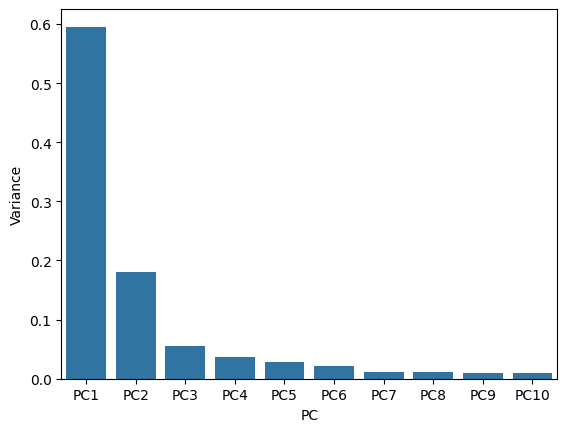

In [79]:
x = features
y=df["Level"]
n_comp=10
pc_list = [f"PC{i+1}" for i in range(n_comp)]

from sklearn import decomposition
pca = decomposition.PCA(n_components=n_comp)
pc = pca.fit_transform(x)
pc_df = pd.DataFrame(data=pc,columns=pc_list)
pc_df['Label'] = y
# variance explained by PCs
# PC1 + PC2 explains 78% variance 
var = pd.DataFrame({'Variance':pca.explained_variance_ratio_,
             'PC':pc_list})

sns.barplot(x='PC',y="Variance", 
           data=var)

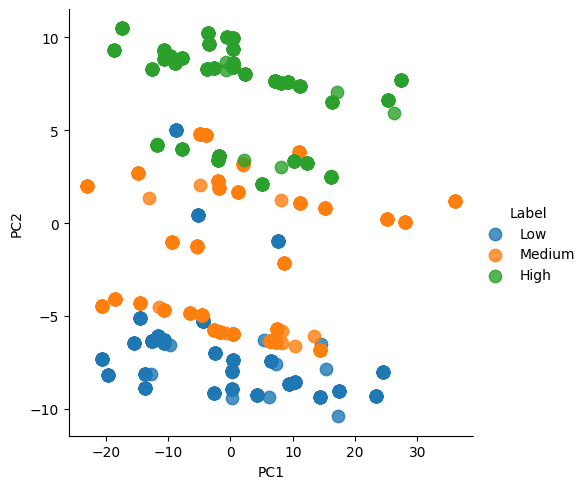

In [80]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Label', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

In [81]:
import plotly.express as plotly_express
figure = plotly_express.scatter_3d(pc_df,x="PC1",y="PC2",z="PC3",color="Label",)
figure.update_layout(showlegend=True)
figure.show()

In [82]:
n_pcs = 2
model = decomposition.PCA(n_components=n_pcs).fit(X_train)
f_ordered = [np.argsort(model.components_[i]) for i in range(n_pcs)]
feature_names = features.columns
f = []
for i in range(n_pcs):
    x = [feature_names[j] for j in f_ordered[i]]
    f.append(x)
# 5 most important features in each PC 
# get the last 5 features (features sorted in increasing order of importance)
# reverse list to sort by most important 
ls = [f[i][-5:][::-1] for i in range(n_pcs)]
data = [['PC{}'.format(i)]+ls[i] for i in range(n_pcs)]
df_features = pd.DataFrame(data,columns=["PC",1,2,3,4,5])
final_features = ls[0] + ls[1]
final_features = list(dict.fromkeys(final_features))
final_features


['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards']

In [83]:
n_pcs = 3
model = decomposition.PCA(n_components=n_pcs).fit(X_train)
f_ordered = [np.argsort(model.components_[i]) for i in range(n_pcs)]
feature_names = features.columns
f = []
for i in range(n_pcs):
    x = [feature_names[j] for j in f_ordered[i]]
    f.append(x)
# 5 most important features in each PC 
# get the last 5 features (features sorted in increasing order of importance)
# reverse list to sort by most important 
ls = [f[i][-5:][::-1] for i in range(n_pcs)]
data = [['PC{}'.format(i)]+ls[i] for i in range(n_pcs)]
df_features = pd.DataFrame(data,columns=["PC",1,2,3,4,5])
final_features = ls[0] + ls[1] + ls[2]
final_features = list(dict.fromkeys(final_features))
final_features


['Age',
 'Alcohol use',
 'Smoking',
 'chronic Lung Disease',
 'Fatigue',
 'Coughing of Blood',
 'Chest Pain',
 'Genetic Risk',
 'OccuPational Hazards',
 'Shortness of Breath',
 'Weight Loss',
 'Clubbing of Finger Nails',
 'Dry Cough',
 'Wheezing']

### Method 3

In [84]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train decision tree classifier
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a dictionary mapping feature names to importances
feature_importance_dict = dict(zip(list(X_train.columns), feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
Coughing of Blood: 0.3734
Wheezing: 0.2579
Obesity: 0.1290
Snoring: 0.1131
OccuPational Hazards: 0.0713
Clubbing of Finger Nails: 0.0327
Genetic Risk: 0.0225
Age: 0.0000
Gender: 0.0000
Air Pollution: 0.0000
Alcohol use: 0.0000
Dust Allergy: 0.0000
chronic Lung Disease: 0.0000
Balanced Diet: 0.0000
Smoking: 0.0000
Passive Smoker: 0.0000
Chest Pain: 0.0000
Fatigue: 0.0000
Weight Loss: 0.0000
Shortness of Breath: 0.0000
Swallowing Difficulty: 0.0000
Frequent Cold: 0.0000
Dry Cough: 0.0000


#### Baseline linear model: SVM
- model 1: using all features 
- model 2: using selected features 

#### Model comparisons
- model 1 vs model 2: to see the importance of feature selection
- model 2 vs actual model: to see the importance of hyperparameter tuning and validation etc.

##### model 1

In [85]:
#label encoder from sklearn doesn't work for this case cause they will label encode by the alphabetical order
df['Level'] = df['Level'].apply(lambda x: ["Low", "Medium", "High"].index(x))

In [86]:
df['Level']

0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64

In [87]:
features.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [88]:
from sklearn.model_selection import train_test_split
X = features
# Can replace this with our features when we have
y = df["Level"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# linear_clf = svm.SVC(probability=True)
linear_clf = svm.SVC(kernel="linear", decision_function_shape='ovo', probability=True)
linear_clf.fit(X_train, y_train)
y_pred = linear_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [90]:
#Cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(linear_clf, X, y, cv=5)
print("Mean CV accuracy:", cv_scores.mean())

Mean CV accuracy: 1.0


In [91]:
y_pred_prob = linear_clf.predict_proba(X_test)[:, 1] 
y_pred_prob

array([9.83167754e-01, 9.83101745e-01, 9.79247431e-01, 1.51784117e-06,
       9.99674660e-01, 9.85602281e-01, 9.83101745e-01, 9.99674709e-01,
       9.81978076e-01, 9.83315836e-01, 1.47663594e-02, 9.91876226e-01,
       9.82321561e-01, 9.91826081e-01, 8.97381655e-05, 1.37476077e-06,
       1.55421095e-02, 3.36588684e-09, 3.80910176e-06, 9.74733464e-03,
       1.51784117e-06, 9.92552538e-01, 1.69308684e-05, 9.91789979e-01,
       9.74921872e-03, 1.57179887e-02, 9.92004887e-01, 1.37573849e-06,
       1.08752782e-02, 9.84874368e-03, 8.97381655e-05, 2.32705919e-06,
       9.93926596e-01, 8.54452114e-06, 1.73138968e-02, 9.74544866e-03,
       9.74640159e-03, 9.99674730e-01, 1.51784117e-06, 9.84721510e-03,
       3.36588684e-09, 3.36596375e-09, 9.04354056e-05, 9.80729178e-01,
       9.83167754e-01, 8.54452114e-06, 1.08752782e-02, 9.91681652e-01,
       3.36588684e-09, 1.14850597e-05, 9.80130490e-01, 3.88691447e-03,
       1.57179887e-02, 9.94824923e-04, 9.94824923e-04, 9.74450377e-03,
      

In [92]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression(random_state=42) #, max_iter=1000
logistic_clf.fit(X_train, y_train)
# Predicting on the test set
y_pred = logistic_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.995


/Users/eugenegan/Documents/GitHub_repo/Lung_Cancer_Prediction/ML_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.995


In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
X = features
# X= scaler.fit_transform(X)

X[['Age']] = scaler.fit_transform(X[['Age']])
# X_test_scaled = scaler.transform(X_test)
# Can replace this with our features when we have
y = df["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


logistic_clf = LogisticRegression(random_state=42)
logistic_clf.fit(X_train, y_train)
# Predicting on the test set
y_pred = logistic_clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  1.0


/Users/eugenegan/Documents/GitHub_repo/Lung_Cancer_Prediction/ML_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#### Evaluation metrics
- Confusion matrix: accuracy, recall, precision, F1 score 

In [95]:
# define evaluation metric formulas

def accuracy(TP,FP,TN,FN):
  return (TP+TN)/(TP+TN+FP+FN)

def recall(TP,FN):
  return TP/(FN+TP)

def precision(TP,FP):
  return TP/(TP+FP)

def F1(precision,recall):
  return 2/((1/precision)+(1/recall))

In [96]:
def micro_av(confusion_matrix):
  TP_ls = []
  FP_ls = []
  TN_ls = []
  FN_ls = []
  c = confusion_matrix.shape[0]

  for i in range(3):
    TP = confusion_matrix[i][i]
    row_without_TP = np.delete(confusion_matrix[i],i)
    FP = np.sum(row_without_TP)
    FN = np.sum(confusion_matrix[:,i])-TP
    other_cols = np.delete(confusion_matrix,i,axis=1)
    TN = np.sum(other_cols)-FP

    TP_ls.append(TP)
    FP_ls.append(FP)
    TN_ls.append(TN)
    FN_ls.append(FN)

  # calculate mean of confusion matrix
  TP = sum(TP_ls)/c
  FP = sum(FP_ls)/c
  TN = sum(TN_ls)/c
  FN = sum(FN_ls)/c

  # calculate evaluation metrics
  a = accuracy(TP,FP,TN,FN)
  r = recall(TP,FN)
  p = precision(TP,FP)
  f1 = F1(p,r)
  print(f'accuracy={a}')
  print(f'recall={r}')
  print(f'precision={p}')
  print(f'f1 score={f1}')

In [97]:
def macro_av(confusion_matrix):
  a_ls = []
  p_ls = []
  r_ls = []
  f1_ls = []
  c = confusion_matrix.shape[0]

  for i in range(c):
    TP = confusion_matrix[i][i]
    row_without_TP = np.delete(confusion_matrix[i],i)
    FP = np.sum(row_without_TP)
    FN = np.sum(confusion_matrix[:,i])-TP
    other_cols = np.delete(confusion_matrix,i,axis=1)
    TN = np.sum(other_cols)-FP

    # calculate evaluation metrics
    a = accuracy(TP,FP,TN,FN)
    r = recall(TP,FN)
    p = precision(TP,FP)
    f1 = F1(p,r)

    a_ls.append(a)
    r_ls.append(r)
    p_ls.append(p)
    f1_ls.append(f1)

  # calculate mean of evaluation metrics
  a = sum(a_ls)/c
  r = sum(r_ls)/c
  p = sum(p_ls)/c
  f1 = sum(f1_ls)/c
  print(f'accuracy={a}')
  print(f'recall={r}')
  print(f'precision={p}')
  print(f'f1 score={f1}')

In [98]:
# confusion matrix example 
confusion_matrix_values = np.array([
    [10, 2, 1],
    [3, 13, 2],
    [3, 4, 7]
])

In [99]:
micro_av(confusion_matrix_values)

accuracy=0.7777777777777778
recall=0.6666666666666666
precision=0.6666666666666666
f1 score=0.6666666666666666


In [100]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

def create_conclusion_matrix(y_true, y_pred, model_name, average_type=None): #choices for average_type: {‘binary’, ‘micro’, ‘macro’}
    scores=precision_recall_fscore_support(y_true, y_pred, average=average_type)
    print(f" Precision: {scores[0]:.2f}, Recall: {scores[1]:.2f}, F1-score: {scores[2]:.2f}")
    confusion_scores_matrix = confusion_matrix(y_true, y_pred)
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    
    ax = plt.subplot() 
    sns.heatmap(confusion_scores_matrix, annot=True, fmt='g', ax=ax, cbar=False)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix for {model_name}')


    ax.xaxis.set_ticklabels(unique_labels)
    ax.yaxis.set_ticklabels(unique_labels)
    plt.show()

 Precision: 1.00, Recall: 1.00, F1-score: 1.00


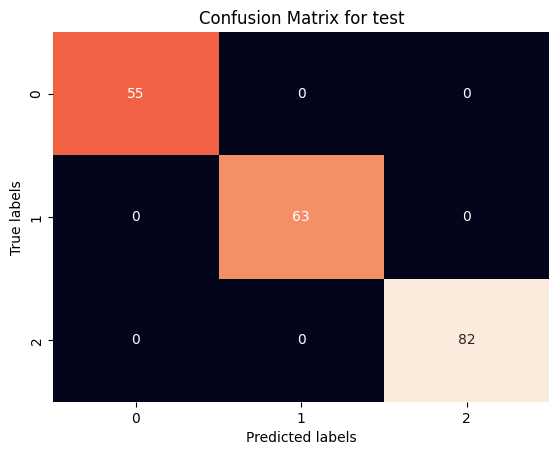

In [101]:
create_conclusion_matrix(y_test, y_pred, "test", average_type="macro")